In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants as const

%matplotlib inline

In [3]:
a12_data = pd.read_excel(
	r'C:\Appl\mydev\dump\WINC_OnePager\notebooks\Poretryksplott A-12 nytt RKB, 80 bar depletion in res, after cement log and updated barrier depths.xlsx',
	header=2,      # Row 3 is header (0-based index)
	skiprows= [3,4,5],  # Skip rows 4, 5, 6
	
)


a12_data = a12_data.drop(a12_data.columns[0], axis=1)

In [4]:
# where WellClass and Ga[ codes are located
sys.path.append('../../')

In [13]:
# WellClass
# from well_class_v2 import csv_parser, Well
from src.WellClass.libs.utils import (
    csv_parser,
    yaml_parser
)

from src.WellClass.libs.well_class import Well
from src.WellClass.libs.well_pressure import Pressure



# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
    plot_pt,
    plot_sketch,
    plot_onepager
)

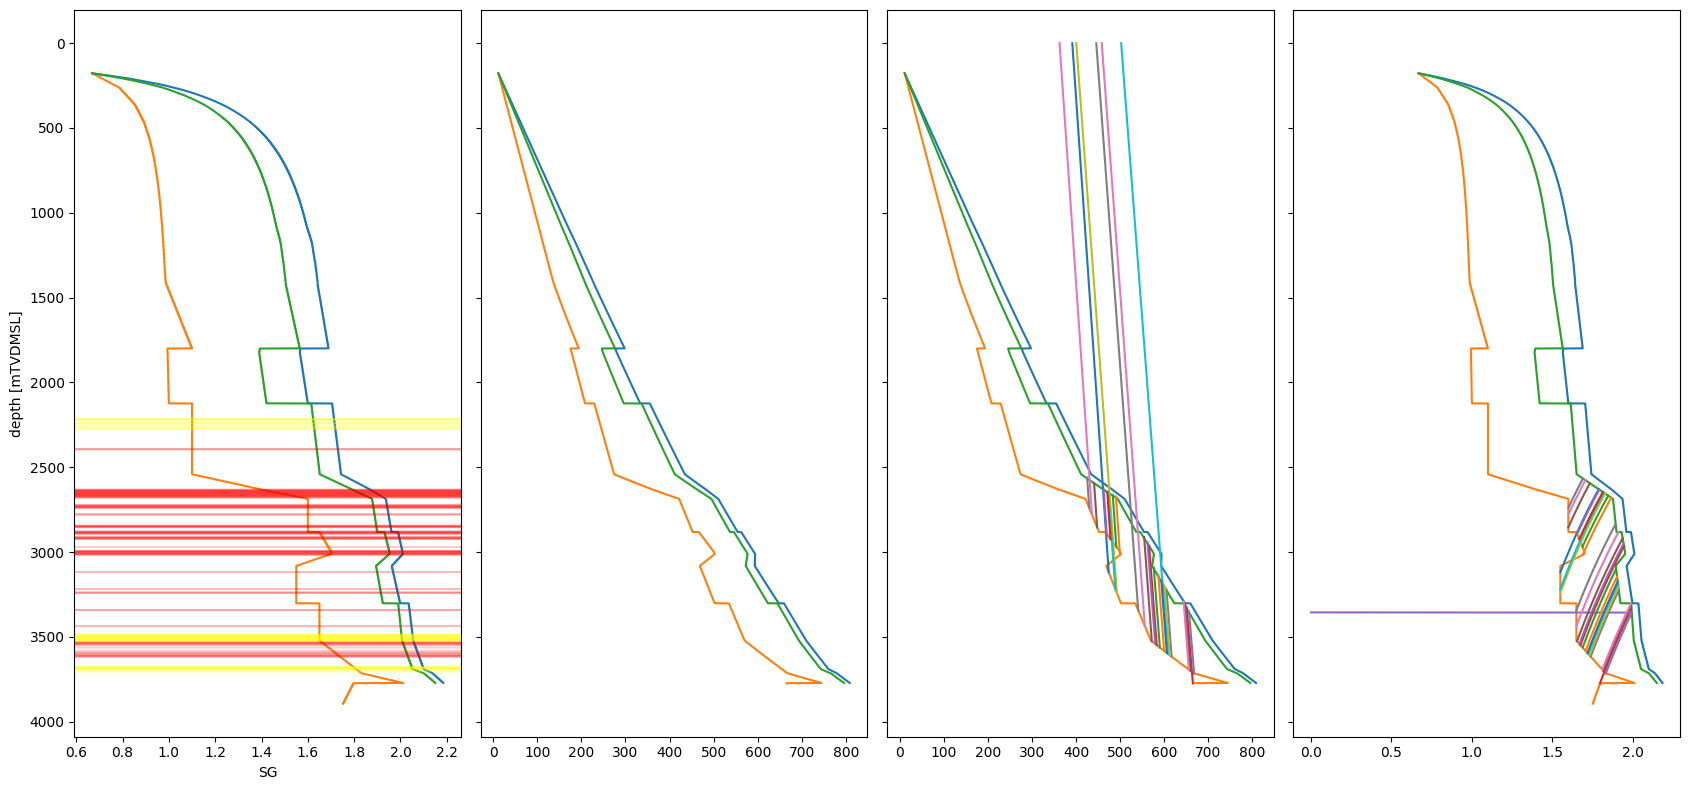

In [14]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, sharey=True, figsize=(17,8))


cols_in_ax0 = [5,6,7]

for col in cols_in_ax0:
    ax0.plot(a12_data.iloc[:,col], a12_data.iloc[:,3], label=a12_data.columns[col])
    ax3.plot(a12_data.iloc[:,col], a12_data.iloc[:,3], label=a12_data.columns[col])

cols_in_ax1 = [10, 11, 12]
for col in cols_in_ax1:
	ax1.plot(a12_data.iloc[:,col], a12_data.iloc[:,3], label=a12_data.columns[col])
	ax2.plot(a12_data.iloc[:,col], a12_data.iloc[:,3], label=a12_data.columns[col])


for flow_potential in a12_data['flow potential'].unique():

	if 'limited' in str(flow_potential).lower():
		color = 'yellow'

		for depth_value in a12_data[a12_data['flow potential'] == flow_potential]['DEPTH [mTVD]']:
			ax0.axhline(y=depth_value, color=color, alpha=0.1)
		
	elif 'flow' in str(flow_potential).lower():
		color = 'red'

		for depth_value in a12_data[a12_data['flow potential'] == flow_potential]['DEPTH [mTVD]']:
			ax0.axhline(y=depth_value, color=color, alpha=0.1)



cols_in_ax2 = a12_data.columns[14::3]
for col in cols_in_ax2:
	ax2.plot(pd.to_numeric(a12_data[col], errors='coerce'), a12_data.iloc[:,3], label=col)


cols_in_ax3 = a12_data.columns[16::3]
for col in cols_in_ax3:
	ax3.plot(pd.to_numeric(a12_data[col], errors='coerce'), a12_data.iloc[:,3], label=col)

# ax1.plot(pd.to_numeric(a12_data.iloc[:,14], errors='coerce'), a12_data.iloc[:,3], label=a12_data.columns[14], color='blue')
# ax1.plot(pd.to_numeric(a12_data.iloc[:,14], errors='coerce'), a12_data.iloc[:,3], label=a12_data.columns[14], color='blue')

ax0.invert_yaxis()
ax0.set_ylabel('depth [mTVDMSL]')
ax0.set_xlabel('SG')
# ax0.legend()
# ax1.legend()
fig.tight_layout()

In [15]:
geological_tops= {}

for column_idx in range(len(a12_data.columns))[14::3]:
	column = a12_data.columns[column_idx]
	depth = a12_data[~pd.to_numeric(a12_data[column], errors='coerce').isnull()]['DEPTH [mTVD]'].max()
	pressure=a12_data[a12_data["DEPTH [mTVD]"]==depth][column].iloc[0]
	fluid_gradient = a12_data.iloc[:,column_idx+1].dropna().iloc[-1]
	msad = a12_data.loc[(a12_data[a12_data.columns[12]] - a12_data[column]).abs().idxmin(), 'DEPTH [mTVD]']
	geological_tops[column] = (float(depth), float(pressure), float(fluid_gradient), float(msad))

print(geological_tops)



{'Res': (3772.2, 665.0, 0.032, 3331.2), 'Heather': (3714.2, 667.87741566, 0.032, 3355.2), 'Cromer Knoll': (3700.2, 659.91512916, 0.03139, 3317.2), 'Svarte': (3692.2, 655.9529290199999, 0.02943, 3302.2), 'Tryggvason(1)': (3616.2, 616.90889358, 0.02943, 3225.2), 'Tryggvason(2)': (3607.2, 612.54259992, 0.02943, 3204.2), 'Tryggvason(3)': (3599.2, 608.35945896, 0.02943, 3185.2), 'Tryggvason(4)': (3594.2, 606.10396338, 0.02943, 3174.2), 'Tryggvason(5)': (3582.2, 599.86339074, 0.02943, 3144.2), 'Tryggvason(6)': (3562.2, 590.2241239800001, 0.02943, 3098.2), 'Tryggvason(7)': (3548.2, 583.0313535, 0.02943, 2964.2), 'Tryggvason(8)': (3541.2, 579.79678068, 0.02943, 2950.2), 'Kyrre (1)': (3525.2, 571.9897864799999, 0.02845, 2918.2), 'Kyrre (2)': (3436.2, 556.200513, 0.02845, 2881.2), 'Kyrre (3)': (3343.2, 541.147068, 0.02845, 2834.2), 'Kyrre (4)': (3241.2, 492.840666, 0.02845, 2654.2), 'Kyrre (5)': (3218.2, 489.34340100000003, 0.02845, 2649.2), 'Kyrre (6)': (3119.2, 474.2899560000001, 0.02649, 2629

In [16]:



geological_tops



geological_tops_df = pd.DataFrame.from_dict(geological_tops, orient='index', columns=['depth', 'pressure', 'gradient', 'msad'])
geological_tops_df['msad_msl'] = geological_tops_df['msad'] - 57
geological_tops_df['depth_msl'] = geological_tops_df['depth'] - 57

geological_tops_df.index.name = 'top'

geological_tops_df['sg'] = (geological_tops_df['gradient'] * const.bar/const.g) / 1e3
geological_tops_df

,depth,pressure,gradient,msad,msad_msl,depth_msl,sg
top,,,,,,,
Res,3772.2,665.000000,0.03200,3331.2,3274.2,3715.2,0.326309
Heather,3714.2,667.877416,0.03200,3355.2,3298.2,3657.2,0.326309
Cromer Knoll,3700.2,659.915129,0.03139,3317.2,3260.2,3643.2,0.320089
Svarte,3692.2,655.952929,0.02943,3302.2,3245.2,3635.2,0.300102
Tryggvason(1),3616.2,616.908894,0.02943,3225.2,3168.2,3559.2,0.300102
Tryggvason(2),3607.2,612.542600,0.02943,3204.2,3147.2,3550.2,0.300102
Tryggvason(3),3599.2,608.359459,0.02943,3185.2,3128.2,3542.2,0.300102
Tryggvason(4),3594.2,606.103963,0.02943,3174.2,3117.2,3537.2,0.300102
Tryggvason(5),3582.2,599.863391,0.02943,3144.2,3087.2,3525.2,0.300102


In [17]:
import os
# Retrieve PVT data that is available


directory_path = '../../src/WellClass/libs/pvt/pvt_constants'

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    # print(filename)
    file_path = os.path.join(directory_path, filename)
    if os.path.isdir(file_path):
        print(f'{filename}')

methane
mixture1
mixture2
pure_co2
water


In [18]:

shmin_data = a12_data[~a12_data['SHMIN'].isnull()][['DEPTH [mTVD]','SHMIN']].values
shmin_data[:,0] = shmin_data[:,0] - 57
my_pressure = Pressure(
    # wellbore seafloor depth mTVD MSL.
    sf_depth_msl=115, #wellbore.water_depth,
    # wellbore total depth in mTVD RKB
    well_td_rkb=3800, #total_depth_rkb,
    # wellbore rkb in mTVD RKB
    well_rkb=57,
    # seafloor temperature in degC
    sf_temp=4, #DEFAULT_SEAFLOOR_TEMPERATURE,
    # geothermal gradient in degC/km
    geo_tgrad=40, #DEFAULT_GEOTHERMAL_GRADIENT,
    # path to the pvt constants folder
    pvt_path=directory_path,
    fluid_type='pure_co2',
	# z_fluid_contact=3000,
    ip_shmin_data=shmin_data,
)

c:\Appl\mydev\dump\WINC_OnePager\notebooks\martin_linge\../..\src\WellClass\libs\well_pressure\Pressure.py:198: UserWarning: No Shmin data between seafloor depth (115) and minimum provided depth (121.19999999999999). Extrapolating using hydrostatic pressure at seafloor.
  warnings.warn(


In [19]:
for top, row in geological_tops_df.iterrows():
	depth, pressure, sg = row['depth_msl'], row['pressure'], row['sg']

	my_pressure.add_scenario(scenario_name=top, from_resrvr=True, z_resrv=depth, p_resrv=pressure, specific_gravity=sg)

Computing pressure profile for scenario: Res
Computing pressure profile for scenario: Heather
Computing pressure profile for scenario: Cromer Knoll
Computing pressure profile for scenario: Svarte
Computing pressure profile for scenario: Tryggvason(1)
Computing pressure profile for scenario: Tryggvason(2)
Computing pressure profile for scenario: Tryggvason(3)
Computing pressure profile for scenario: Tryggvason(4)
Computing pressure profile for scenario: Tryggvason(5)
Computing pressure profile for scenario: Tryggvason(6)
Computing pressure profile for scenario: Tryggvason(7)
Computing pressure profile for scenario: Tryggvason(8)
Computing pressure profile for scenario: Kyrre (1)
Computing pressure profile for scenario: Kyrre (2)
Computing pressure profile for scenario: Kyrre (3)
Computing pressure profile for scenario: Kyrre (4)
Computing pressure profile for scenario: Kyrre (5)
Computing pressure profile for scenario: Kyrre (6)
Computing pressure profile for scenario: Kyrre (7)
Computi

In [20]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_MSAD_brine,p_MSAD_brine,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,Res,True,3273.715870,650.872508,3222.887685,618.095162,3715.2,665.000000,3715.2,665.000000,298.534848,None,None,0.326309
1,Heather,True,3298.652575,656.403898,3244.318907,628.516041,3657.2,667.877416,3657.2,667.877416,306.887208,None,None,0.326309
2,Cromer Knoll,True,3260.119934,647.890246,3235.810350,621.062900,3643.2,659.915129,3643.2,659.915129,300.247919,None,None,0.320089
3,Svarte,True,3245.930283,644.496721,3213.223061,615.689510,3635.2,655.952929,3635.2,655.952929,297.041970,None,None,0.300102
4,Tryggvason(1),True,3167.810797,605.390309,2827.767904,546.638634,3559.2,616.908894,3559.2,616.908894,265.191455,None,None,0.300102
5,Tryggvason(2),True,3147.160894,600.681159,2824.826009,542.839695,3550.2,612.542600,3550.2,612.542600,261.678113,None,None,0.300102
6,Tryggvason(3),True,3128.112935,596.172877,2824.358615,539.369510,3542.2,608.359459,3542.2,608.359459,258.253343,None,None,0.300102
7,Tryggvason(4),True,3116.721095,593.729269,2824.115511,537.564580,3537.2,606.103963,3537.2,606.103963,256.471921,None,None,0.300102
8,Tryggvason(5),True,3087.201747,586.973102,2788.789831,529.030907,3525.2,599.863391,3525.2,599.863391,251.369412,None,None,0.300102
9,Tryggvason(6),True,3041.244083,576.569901,2722.966088,514.885303,3505.2,590.224124,3505.2,590.224124,243.627818,None,None,0.300102


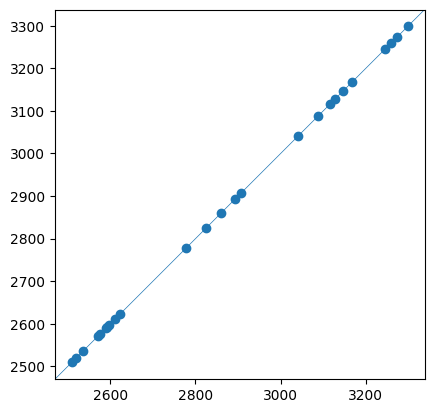

In [25]:
fig, ax = plt.subplots()
ax.scatter(my_pressure.scenario_manager.get_scenarios_summary()['z_MSAD'], geological_tops_df['msad_msl'])
ax.axline([geological_tops_df['msad_msl'].mean()]*2, slope=1, lw=0.5)
ax.set_aspect('equal', adjustable='box')


In [28]:
geological_tops_df['msad_screen'] = my_pressure.scenario_manager.get_scenarios_summary()['z_MSAD'].values

In [30]:
geological_tops_df['msad_diff'] = geological_tops_df['msad_screen'] - geological_tops_df['msad_msl']

In [31]:
geological_tops_df[['msad_msl', 'msad_screen', 'msad_diff']]

,msad_msl,msad_screen,msad_diff
top,,,
Res,3274.2,3273.715870,-0.484130
Heather,3298.2,3298.652575,0.452575
Cromer Knoll,3260.2,3260.119934,-0.080066
Svarte,3245.2,3245.930283,0.730283
Tryggvason(1),3168.2,3167.810797,-0.389203
Tryggvason(2),3147.2,3147.160894,-0.039106
Tryggvason(3),3128.2,3128.112935,-0.087065
Tryggvason(4),3117.2,3116.721095,-0.478905
Tryggvason(5),3087.2,3087.201747,0.001747


In [26]:
my_pressure.scenario_manager.get_scenarios_summary()['z_MSAD']

0     3273.715870
1     3298.652575
2     3260.119934
3     3245.930283
4     3167.810797
5     3147.160894
6     3128.112935
7     3116.721095
8     3087.201747
9     3041.244083
10    2907.018834
11    2893.262940
12    2861.038563
13    2824.500009
14    2777.630184
15    2597.659541
16    2592.640306
17    2572.034505
18    2622.752209
19    2610.301081
20    2588.805910
21    2574.800046
22    2536.777209
23    2518.926506
24    2509.207550
Name: z_MSAD, dtype: float64

In [159]:
fluid_p = pd.read_csv(r'C:\Appl\mydev\dump\WINC_OnePager\notebooks\martin_linge\test_file.txt', header=None, names=['Depth', 'Pressure'])

depth_values=[3965.2, 3907.2, 3893.2, 3885.2, 3809.2, 3800.2, 3792.2, 3787.2, 3775.2, 3755.2, 3741.2, 3734.2, 3718.2, 3629.2, 3536.2, 3434.2, 3411.2, 3312.2, 3209.2, 3161.2, 3116.2, 3086.2, 3047.2, 2973.2, 2933.2]


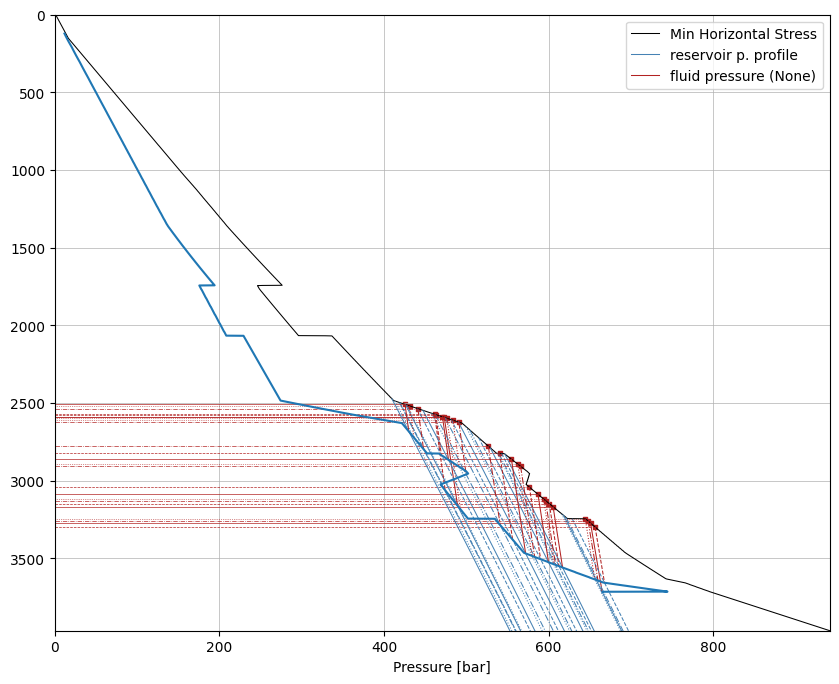

In [33]:
fig, ax = plt.subplots(ncols=1, figsize=(10,8))



plot_pressure(my_pressure, ax=ax, 
              plot_HSP=False, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.plot(a12_data.iloc[:,11], a12_data.iloc[:,3]-57, label=a12_data.columns[11])


# ax.scatter(geological_tops_df['Pressure'], geological_tops_df['Depth']-57, color='red')


In [166]:
for top in geological_tops:
	depth, pressure, fl_gradient = geological_tops[top]

	my_pressure.add_scenario(scenario_name=top, from_resrvr=True, z_resrv=depth-57, p_resrv=pressure)

ValueError: Scenario with name 'Res' already exists.

In [165]:
top

'Res'